In [2]:
#Step #1: Importing the packages and data

In [5]:
import pandas as pd  # We require pandas to import the data from the csv files.
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import matplotlib.pyplot as plt
import lightgbm as lgb
import seaborn as sn
from lightgbm import LGBMClassifier
from sklearn.model_selection import RepeatedKFold
from lightgbm import LGBMRegressor
from IPython.core.display import display, HTML
from sklearn.metrics import mean_squared_error
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import statistics as st
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
import warnings 
warnings.filterwarnings('ignore')


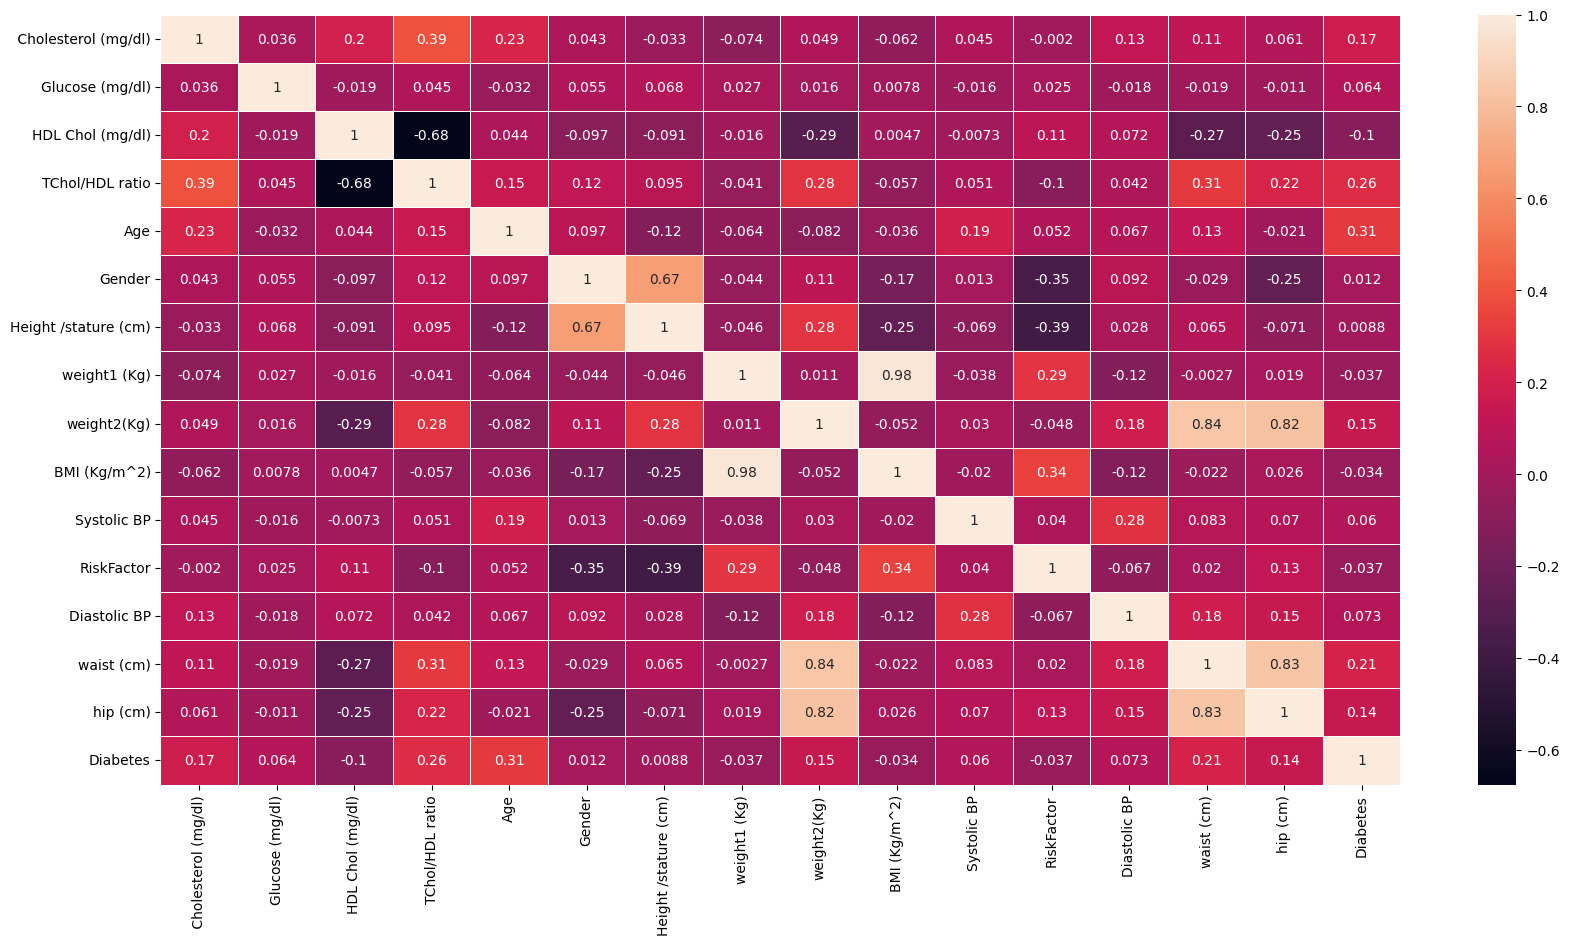

In [6]:
df=pd.read_csv('Diabetes_raw_dataset.csv') #reading csv file and storing in dataframe

df.drop(columns=["Patient number"], inplace=True)#Removing this column will not create major impoct on data as it only denotes the patent number

#If we have non numeric data then mathematical operation on text is not possible for this problem statement, Hence we will change that text to either numeric or binary data
#The dataset contains non numeric values. So 1st we will do Data-Preprocessing for the dataframe and convert NaN and null value to a numeric value.
#For these, we are taking average of each column and replacing it with NaN and null values. For for `Gender` and `Diabetes` column.
#we have converted it into numeric data as `1`'s and `0`'s and we taken max repeated values
#because if we take average of these columns then there is a possibility that the average value might not be in 1's and 0's. 
#For filling values in `BMI`, we have calculated BMI with proper formula using Weight and Height.

def most_frequent(List):
    return max(set(List), key=List.count)


Cholesterol=df.loc[:," Cholesterol (mg/dl)"]
df[' Cholesterol (mg/dl)'] = df[' Cholesterol (mg/dl)'].fillna(round(np.mean(Cholesterol),0))
df[' Cholesterol (mg/dl)'].replace(to_replace = 0, value = round(np.mean(Cholesterol),0), inplace=True)
Glucose=df.loc[:,"Glucose (mg/dl)"]
df['Glucose (mg/dl)'] = df['Glucose (mg/dl)'].fillna(round(np.mean(Glucose),0))
df['Glucose (mg/dl)'].replace(to_replace = 0, value = round(np.mean(Glucose),0), inplace=True)                                                           
HDLChol=df.loc[:,"HDL Chol (mg/dl)"]
df['HDL Chol (mg/dl)'] = df['HDL Chol (mg/dl)'].fillna(round(np.mean(HDLChol),0))
df['HDL Chol (mg/dl)'].replace(to_replace = 0, value = round(np.mean(HDLChol),0), inplace=True)                                                           
TChol=df.loc[:,"TChol/HDL ratio"]
df['TChol/HDL ratio'] = df['TChol/HDL ratio'].fillna(round(np.mean(TChol),0))
df['TChol/HDL ratio'].replace(to_replace = 0, value = round(np.mean(TChol),0), inplace=True) 
Age=df.loc[:,"Age"]
df['Age'] = df['Age'].fillna(round(np.mean(Age),0))
df['Age'].replace(to_replace = 0, value = round(np.mean(Age),0), inplace=True)
df['Gender'] = df['Gender'].replace(['male'], 1)
df['Gender'] = df['Gender'].replace(['female'], 0)
df['Gender'] = pd.to_numeric(df['Gender'], errors='coerce')
df['Gender'] = df['Gender'].fillna(most_frequent(df['Gender'].values.tolist()))
Height_stature=df.loc[:,"Height /stature (cm)"]
df['Height /stature (cm)'] = df['Height /stature (cm)'].fillna(round(np.mean(Height_stature),0))
df['Height /stature (cm)'].replace(to_replace = 0, value = round(np.mean(Height_stature),0), inplace=True)
weight1=df.loc[:,"weight1 (Kg)"]
df['weight1 (Kg)'] = df['weight1 (Kg)'].fillna(round(np.mean(weight1),0))
df['weight1 (Kg)'].replace(to_replace = 0, value = round(np.mean(weight1),0), inplace=True)
weight2=df.loc[:,"weight2(Kg)"]
df['weight2(Kg)'] = df['weight2(Kg)'].fillna(round(np.mean(weight2),0))
df['weight2(Kg)'].replace(to_replace = 0, value = round(np.mean(weight2),0), inplace=True)
Systolic_BP=df.loc[:,"Systolic BP"]
df['Systolic BP'] = df['Systolic BP'].fillna(round(np.mean(Systolic_BP),0))
df['Systolic BP'].replace(to_replace = 0, value = round(np.mean(Systolic_BP),0), inplace=True)
Diastolic=df.loc[:,"Diastolic BP"]
df['Diastolic BP'] = df['Diastolic BP'].fillna(round(np.mean(Diastolic),0))
df['Diastolic BP'].replace(to_replace = 0, value = round(np.mean(Diastolic),0), inplace=True)
waist=df.loc[:,"waist (cm)"]
df['waist (cm)'] = df['waist (cm)'].fillna(round(np.mean(waist),0))
df['waist (cm)'].replace(to_replace = 0, value = round(np.mean(waist),0), inplace=True)
hip=df.loc[:,"hip (cm)"]
df['hip (cm)'] = df['hip (cm)'].fillna(round(np.mean(hip),0))
df['hip (cm)'].replace(to_replace = 0, value = round(np.mean(hip),0), inplace=True)
df['Diabetes'] = df['Diabetes'].replace(['Diabetes'], 1)
df['Diabetes'] = df['Diabetes'].replace(['No diabetes'], 0)
#df2['date'] = df['Diabetes'].values
df2 = pd.DataFrame(df, columns = ['Diabetes']) 
#df['Diabetes'] = df['Diabetes'].astype(int)
df2=df2.dropna()
df['Diabetes'] = df['Diabetes'].fillna(most_frequent(df2['Diabetes'].values.tolist()))
df['Diabetes'] = df['Diabetes'].astype(int)
df['Diabetes'] = pd.to_numeric(df['Diabetes'], errors='coerce')
#BMI=df.loc[:,"BMI (Kg/m^2)"]
#df['BMI (Kg/m^2)'] = df['BMI (Kg/m^2)'].fillna(round(np.mean(BMI),0))
df['BMI (Kg/m^2)'] = round((df['weight1 (Kg)'] / ((df['Height /stature (cm)']/100.0) ** 2)),2)
#df['BMINew(Kg/m^2)'] = round((df['weight1 (Kg)'] / ((df['Height /stature (cm)']/100.0) ** 2)),2)
#df['BMI (Kg/m^2)']
#idx = 11
#print(df['BMI (Kg/m^2)'].values.tolist())
df.insert(loc=11, column='RiskFactor', value=np.where(df['BMI (Kg/m^2)'] >=25, 1,0))#-----'explain'
#df = df.drop('RiskFactor', axis=1)
#print(df)
#df[' Cholesterol (mg/dl)'] = df[' Cholesterol (mg/dl)'].astype(int)
#df['Glucose (mg/dl)'] = df['Glucose (mg/dl)'].astype(int)
#df['HDL Chol (mg/dl)'] = df['HDL Chol (mg/dl)'].astype(int)
#df['TChol/HDL ratio'] = df['TChol/HDL ratio'].astype(int)
#df['Age'] = df['Age'].astype(int)
#df['Gender'] = df['Gender'].astype(int)
#df['Height /stature (cm)'] = df['Height /stature (cm)'].astype(int)
#df['weight1 (Kg)'] = df['weight1 (Kg)'].astype(int)
#df['weight2(Kg)'] = df['weight2(Kg)'].astype(int)
#df['Systolic BP'] = df['Systolic BP'].astype(int)
#df['Diastolic BP'] = df['Diastolic BP'].astype(int)
#df['waist (cm)'] = df['waist (cm)'].astype(int)
#df['hip (cm)'] = df['hip (cm)'].astype(int)
#df['RiskFactor'] = df['RiskFactor'].astype(int)
#df.replace([np.inf, -np.inf], 0, inplace=True)
#print(np.isinf(df[' Cholesterol (mg/dl)']).any())
#print(np.isinf(df['Glucose (mg/dl)']).any())
#print(np.isinf(df['HDL Chol (mg/dl)']).any())
#print(np.isinf(df['TChol/HDL ratio']).any())
#print(np.isinf(df['Age']).any())
#print(np.isinf(df['Gender']).any())
#print(np.isinf(df['Height /stature (cm)']).any())
#print(np.isinf(df['weight1 (Kg)']).any())
#print(np.isinf(df['weight2(Kg)']).any())
#print(np.isinf(df['Systolic BP']).any())
#print(np.isinf(df['Diastolic BP']).any())
#print(np.isinf(df['waist (cm)']).any())
#print(np.isinf(df['hip (cm)']).any())
#print(np.isinf(df['RiskFactor']).any())
#print(np.isinf(df['BMI (Kg/m^2)']).any())
#print(np.isinf(df['BMINew(Kg/m^2)']).any())
#print(np.isinf(df['Diabetes']).any())
#df['Loc'].str.contains('some')
#print(df)
corr=df.corr()
#print(corr_matrix)
corr_matrix = df.corr()
plt.figure(figsize=(20, 10))
sn.heatmap(corr_matrix, annot=True,linewidths=.5)
plt.show()


In [171]:
df.head()

,Cholesterol (mg/dl),Glucose (mg/dl),HDL Chol (mg/dl),TChol/HDL ratio,Age,Gender,Height /stature (cm),weight1 (Kg),weight2(Kg),BMI (Kg/m^2),Systolic BP,RiskFactor,Diastolic BP,waist (cm),hip (cm),Diabetes
0,193.0,77.0,49.0,3.9,19,0.0,154.9,54.93,54,22.89,118.0,0,70.0,81.3,96.5,0
1,146.0,79.0,41.0,3.6,19,0.0,152.4,98.97,61,42.61,108.0,1,58.0,83.8,101.6,0
2,217.0,75.0,54.0,4.0,20,0.0,170.2,116.22,85,40.12,110.0,1,72.0,101.6,114.3,0
3,226.0,97.0,70.0,3.2,20,0.0,162.6,54.03,52,20.44,122.0,0,64.0,78.7,99.1,0
4,164.0,91.0,67.0,2.4,20,0.0,177.8,83.08,64,26.28,122.0,1,86.0,81.3,99.1,0


In [172]:
#why 70:30? justify
data = df.values
print(df.values)
X, y = data[:, :-1], data[:, -1]
#print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) #splitting data in ratio of 70:30 for training and testing respectively.
#print(X_train.isnull().values.any())
#print(type(y_train))
#print(np.any(np.isnan(X_test)))
#print('--------------')
#print(np.all(np.isinf(X_test)))
#print(np.isinf(y_train).any())
#print(np.isinf(X_train).any())
from sklearn import utils
print(utils.multiclass.type_of_target(y_train))

[[193.   77.   49.  ...  81.3  96.5   0. ]
 [146.   79.   41.  ...  83.8 101.6   0. ]
 [217.   75.   54.  ... 101.6 114.3   0. ]
 ...
 [283.   83.   74.  ... 104.1 111.8   0. ]
 [228.   79.   37.  ... 121.9 124.5   0. ]
 [220.   60.   66.  ...  83.8  99.1   0. ]]
binary


In [173]:
df.describe() # Useful in this context due to us having so much data - we can see the range of the values in each columns...

,Cholesterol (mg/dl),Glucose (mg/dl),HDL Chol (mg/dl),TChol/HDL ratio,Age,Gender,Height /stature (cm),weight1 (Kg),weight2(Kg),BMI (Kg/m^2),Systolic BP,RiskFactor,Diastolic BP,waist (cm),hip (cm),Diabetes
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.0000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.00000
mean,208.248000,128.074000,50.336000,4.467000,46.488000,0.424000,167.602600,82.79194,80.3480,29.890540,139.674000,0.672000,82.674000,96.21200,109.113200,0.14600
std,50.626046,413.657948,17.124415,1.651079,17.629278,0.494685,9.979842,46.09775,18.1931,17.809973,56.862381,0.469955,13.571739,14.65341,14.299882,0.35346
min,2.000000,48.000000,1.000000,1.500000,19.000000,0.000000,132.100000,44.95000,45.0000,15.780000,90.000000,0.000000,48.000000,66.00000,76.200000,0.00000
25%,178.000000,81.000000,39.000000,3.200000,31.000000,0.000000,160.000000,68.10000,68.7500,23.107500,120.000000,0.000000,74.000000,83.80000,99.100000,0.00000
50%,204.000000,89.000000,46.000000,4.200000,43.000000,0.000000,167.600000,79.00000,78.5000,28.135000,136.000000,1.000000,82.000000,94.00000,106.700000,0.00000
75%,229.250000,107.250000,59.000000,5.300000,61.000000,1.000000,175.300000,90.80000,90.0000,33.832500,148.000000,1.000000,90.000000,104.10000,116.800000,0.00000
max,500.000000,9091.000000,120.000000,19.300000,92.000000,1.000000,193.000000,996.98000,148.0000,377.090000,1140.000000,1.000000,124.000000,142.20000,162.600000,1.00000


### - Ensemble learning is a method in which multiple models (often called "base models") are trained and their predictions are combined in some way to produce a final prediction..<br> <br> - The Ensemble learning is divided into 2 categories `Basic` and `Advanced`.<br><br>- `Basic Ensemble Techniques`:-<br>1) Max Voting<br>2) Averaging<br>3) Weighted Average <br> <br>- `Advanced  Ensemble Techniques`:-<br>1) Stacking<br>2) Blending<br>3) Bagging<br>4) Boosting <br> <br> - Common ensemble techniques include bagging, boosting, and stacking.<br><br> - Algorithms based on Bagging :- 
### 1) Bagging meta-estimator<br>2) Random Forest<br><br> - Algorithms based on Boosting :- 
### 1) AdaBoost<br>2) GBM<br>3) XGB<br>4) Light GBM<br>5) CatBoost<br><br>

In [174]:
# Max Voting

In [175]:
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()
#print(np.isinf(X_train).any())
#print(np.isinf(y_train).any())
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

# PREDICTION
pred1=model1.predict(X_test)
pred2=model2.predict(X_test)
pred3=model3.predict(X_test)

# FINAL_PREDICTION
final_pred = np.array([])
for i in range(0,len(X_test)):
    final_pred = np.append(final_pred, st.mode([pred1[i], pred2[i], pred3[i]]))
#print(final_pred)
model1 = LogisticRegression(random_state=42)
model2 = tree.DecisionTreeClassifier(random_state=42)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(X_train,y_train)
model.score(X_test,y_test)
max_voting_result=model.score(X_test,y_test)
print(max_voting_result)

0.8933333333333333


In [176]:
# Averaging

In [177]:
model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

pred1=model1.predict_proba(X_test)
pred2=model2.predict_proba(X_test)
pred3=model3.predict_proba(X_test)
#print(pred1)
finalpred=(pred1+pred2+pred3)/3
model1score=model1.score(X_test,y_test)
model2score=model2.score(X_test,y_test)
model3score=model3.score(X_test,y_test)

finalscore=(model1score+model2score+model3score)/3
print(finalscore)
averaging_score=finalscore

0.9155555555555556


In [178]:
# 3) Weighted Average

In [179]:
model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

pred1=model1.predict_proba(X_test)
pred2=model2.predict_proba(X_test)
pred3=model3.predict_proba(X_test)

finalpred=(pred1*0.3+pred2*0.3+pred3*0.4)
#print(finalpred)
model1score=model1.score(X_test,y_test)
model2score=model2.score(X_test,y_test)
model3score=model3.score(X_test,y_test)

finalscore=(model1score+model2score+model3score)/3
print(finalscore)
weighted_average_score=finalscore

0.9133333333333332


In [180]:
# `Advanced Ensemble Techniques`

In [181]:
# Stacking

In [182]:
def Stacking(model,train,y,test,n_fold):
    folds=StratifiedKFold(n_splits=n_fold,shuffle=True,random_state=42)
    test_pred=X_test
    train_pred=X_train
    for train_indices,val_indices in folds.split(train,y):
        model.fit(X=X_train,y=y_train)
        train_pred=np.append(train_pred,model.predict(test))
        test_pred=np.append(test_pred,model.predict(test))
    return test_pred.reshape(-1,1),train_pred



model1 = tree.DecisionTreeClassifier(random_state=42)

test_pred1 ,train_pred1=Stacking(model=model1,train=X_train,y=y_train,test=X_test,n_fold=10)

train_pred1=pd.DataFrame(train_pred1)
test_pred1=pd.DataFrame(test_pred1)

model2 = KNeighborsClassifier()

test_pred2 ,train_pred2=Stacking(model=model2,train=X_train,y=y_train,test=X_test,n_fold=10)

train_pred2=pd.DataFrame(train_pred2)
test_pred2=pd.DataFrame(test_pred2)

df = pd.concat([train_pred1, train_pred2], axis=1)
#print(df)
df_test = pd.concat([test_pred1, test_pred2], axis=1)

model = LogisticRegression(random_state=42)
model.fit(X_train,y_train)
model.score(X_test, y_test)
stacking_result=model.score(X_test, y_test)
print(stacking_result)

0.88


In [183]:
# Blending

In [184]:
model1 = tree.DecisionTreeClassifier()
model1.fit(X_train, y_train)
test_pred1=model1.predict(X_test)

model2 = KNeighborsClassifier()
model2.fit(X_train,y_train)
test_pred2=model2.predict(X_test)
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)
blending_result=model.score(X_test,y_test)
print(blending_result)

0.88


In [185]:
# Bagging

In [186]:
# Bagging Meta-Estimator

In [187]:
# Code for Bagging Meta-Estimator: Regression problem

In [188]:
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_train, y_train)
model.score(X_test,y_test)
bagging_classification_result=model.score(X_test,y_test)
print(bagging_classification_result)

0.9333333333333333


In [189]:
# Code for Bagging Meta-Estimator: Regression problem

In [190]:
model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=42))
model.fit(X_train, y_train)
model.score(X_test,y_test)
bagging_regression_result=model.score(X_test,y_test)
print(bagging_regression_result)

0.4748175586023884


In [191]:
# Random Forest

In [192]:
# Code for Random Forest Algorithm

In [193]:
#print (df.dtypes)
model = RandomForestClassifier()
model.fit(X_train, y_train)
predict_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)
random_forest_results=accuracy_test


accuracy_score on test dataset :  0.94


In [194]:
# Boosting

In [195]:
# AdaBoost

In [196]:
# Code for AdaBoost : Classification problem

In [197]:
model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)
model.score(X_test,y_test)
adaboost_classification_result=model.score(X_test,y_test)
print(adaboost_classification_result)

0.9133333333333333


In [198]:
# Code for AdaBoost : Regression problem

In [199]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)
adaboost_regression_result=model.score(X_test,y_test)
print(adaboost_regression_result)

0.27154634172341985


In [200]:
# Gradient Boosting (GBM)

In [201]:
# Code for Gradient Boosting (GBM) : Classification problem

In [202]:
model= GradientBoostingClassifier(learning_rate=0.01,random_state=42)
model.fit(X_train, y_train)
model.score(X_test,y_test)
gbm_classification_result=model.score(X_test,y_test)
print(gbm_classification_result)

0.9066666666666666


In [203]:
# Code for Gradient Boosting (GBM) : Regression problem

In [204]:
model= GradientBoostingRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)
gbm_regression_result=model.score(X_test,y_test)
print(gbm_regression_result)

0.4425661694127848


In [205]:
# XGBoost

In [206]:
# Code for XGBoost : Classification problem

In [207]:
model=xgb.XGBClassifier(random_state=42,learning_rate=0.01)
model.fit(X_train, y_train)
model.score(X_test,y_test)
xgb_classification_result=model.score(X_test,y_test)
print(xgb_classification_result)

0.9066666666666666


In [208]:
# Code for XGBoost : Regression problem

In [209]:
model=xgb.XGBRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)
xgb_regression_result=model.score(X_test,y_test)
print(xgb_regression_result)

0.504245447113975


In [210]:
# Light GBM

In [211]:
# Code for Light GBM : Classification problem

In [212]:
#train_data=lgb.Dataset(X_train,label=y_train)
#define parameters
#params = {'learning_rate':0.001,'force_col_wise':'true'}
#model= lgb.train(params, train_data, 350) 
#y_pred=model.predict(X_test)
#for i in range(0,100):
#    if y_pred[i]>=0.5: 
#        y_pred[i]=1
#    else: 
#        y_pred[i]=0

model = LGBMClassifier()   
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
light_classification_result=accuracy
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
#print('Accuracy: %.3f' % (np.mean(n_scores)))
#light_classification_result=np.mean(n_scores)
#print(light_classification_result)

Accuracy: 0.94


In [213]:
# Code for Light GBM : Regression problem

In [214]:
#train_data=lgb.Dataset(X_train,label=y_train)
#params = {'learning_rate':0.001}
#model= lgb.train(params, train_data, 350)
#rmse=mean_squared_error(y_pred,y_test)**0.5
model = LGBMRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = metrics.r2_score(y_test, y_pred)
print("R^2 score:", score)
light_regression_result=score
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
#print('Accuracy: %.3f' % (np.mean(n_scores)))
#score = model.score(X_test, y_test)

R^2 score: 0.4665543684804633


In [215]:
# CatBoost

In [216]:
### Code for CatBoost : Classification problem

In [217]:
model=CatBoostClassifier()
#model.fit(X_train,y_train,eval_set=(X_test, y_test))
#model.score(X_test,y_test)
#catboost_classification_result=model.score(X_test,y_test)
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# calculate the accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
catboost_classification_result=accuracy

Learning rate set to 0.00658
0:	learn: 0.6856377	total: 1.89ms	remaining: 1.89s
1:	learn: 0.6767269	total: 3.76ms	remaining: 1.88s
2:	learn: 0.6699870	total: 5.65ms	remaining: 1.88s
3:	learn: 0.6612365	total: 7.52ms	remaining: 1.87s
4:	learn: 0.6543216	total: 9.47ms	remaining: 1.88s
5:	learn: 0.6467347	total: 11.3ms	remaining: 1.87s
6:	learn: 0.6386217	total: 13.3ms	remaining: 1.88s
7:	learn: 0.6324298	total: 15.2ms	remaining: 1.88s
8:	learn: 0.6251714	total: 17.3ms	remaining: 1.9s
9:	learn: 0.6178809	total: 19.2ms	remaining: 1.9s
10:	learn: 0.6113401	total: 21.3ms	remaining: 1.92s
11:	learn: 0.6046105	total: 23.4ms	remaining: 1.92s
12:	learn: 0.5988902	total: 25.2ms	remaining: 1.92s
13:	learn: 0.5926123	total: 27ms	remaining: 1.9s
14:	learn: 0.5852708	total: 28.6ms	remaining: 1.88s
15:	learn: 0.5776943	total: 30.3ms	remaining: 1.86s
16:	learn: 0.5712935	total: 32.1ms	remaining: 1.85s
17:	learn: 0.5644784	total: 33.8ms	remaining: 1.84s
18:	learn: 0.5594292	total: 35.2ms	remaining: 1.82

240:	learn: 0.1417356	total: 400ms	remaining: 1.26s
241:	learn: 0.1413419	total: 402ms	remaining: 1.26s
242:	learn: 0.1407640	total: 404ms	remaining: 1.26s
243:	learn: 0.1402889	total: 406ms	remaining: 1.26s
244:	learn: 0.1396954	total: 408ms	remaining: 1.26s
245:	learn: 0.1393406	total: 409ms	remaining: 1.25s
246:	learn: 0.1388855	total: 411ms	remaining: 1.25s
247:	learn: 0.1385928	total: 413ms	remaining: 1.25s
248:	learn: 0.1380794	total: 414ms	remaining: 1.25s
249:	learn: 0.1376137	total: 416ms	remaining: 1.25s
250:	learn: 0.1371775	total: 418ms	remaining: 1.25s
251:	learn: 0.1368639	total: 420ms	remaining: 1.25s
252:	learn: 0.1364682	total: 422ms	remaining: 1.24s
253:	learn: 0.1361303	total: 423ms	remaining: 1.24s
254:	learn: 0.1356684	total: 425ms	remaining: 1.24s
255:	learn: 0.1352639	total: 427ms	remaining: 1.24s
256:	learn: 0.1347961	total: 429ms	remaining: 1.24s
257:	learn: 0.1344220	total: 430ms	remaining: 1.24s
258:	learn: 0.1340000	total: 432ms	remaining: 1.24s
259:	learn: 

487:	learn: 0.0813009	total: 791ms	remaining: 830ms
488:	learn: 0.0812540	total: 792ms	remaining: 828ms
489:	learn: 0.0810952	total: 794ms	remaining: 827ms
490:	learn: 0.0809899	total: 796ms	remaining: 825ms
491:	learn: 0.0809049	total: 798ms	remaining: 824ms
492:	learn: 0.0808279	total: 799ms	remaining: 822ms
493:	learn: 0.0806514	total: 801ms	remaining: 820ms
494:	learn: 0.0803343	total: 802ms	remaining: 819ms
495:	learn: 0.0802727	total: 804ms	remaining: 817ms
496:	learn: 0.0801606	total: 806ms	remaining: 816ms
497:	learn: 0.0799401	total: 808ms	remaining: 814ms
498:	learn: 0.0797769	total: 810ms	remaining: 813ms
499:	learn: 0.0795889	total: 812ms	remaining: 812ms
500:	learn: 0.0794150	total: 814ms	remaining: 810ms
501:	learn: 0.0792896	total: 816ms	remaining: 809ms
502:	learn: 0.0791300	total: 818ms	remaining: 808ms
503:	learn: 0.0789298	total: 819ms	remaining: 806ms
504:	learn: 0.0787810	total: 821ms	remaining: 805ms
505:	learn: 0.0786189	total: 823ms	remaining: 804ms
506:	learn: 

738:	learn: 0.0549137	total: 1.19s	remaining: 420ms
739:	learn: 0.0548764	total: 1.19s	remaining: 418ms
740:	learn: 0.0548328	total: 1.19s	remaining: 417ms
741:	learn: 0.0547617	total: 1.19s	remaining: 415ms
742:	learn: 0.0547074	total: 1.2s	remaining: 414ms
743:	learn: 0.0546424	total: 1.2s	remaining: 412ms
744:	learn: 0.0546323	total: 1.2s	remaining: 410ms
745:	learn: 0.0545869	total: 1.2s	remaining: 409ms
746:	learn: 0.0545586	total: 1.2s	remaining: 407ms
747:	learn: 0.0544712	total: 1.2s	remaining: 406ms
748:	learn: 0.0544315	total: 1.21s	remaining: 404ms
749:	learn: 0.0543388	total: 1.21s	remaining: 402ms
750:	learn: 0.0542047	total: 1.21s	remaining: 401ms
751:	learn: 0.0541332	total: 1.21s	remaining: 399ms
752:	learn: 0.0540144	total: 1.21s	remaining: 397ms
753:	learn: 0.0539482	total: 1.21s	remaining: 396ms
754:	learn: 0.0538459	total: 1.21s	remaining: 394ms
755:	learn: 0.0537734	total: 1.22s	remaining: 393ms
756:	learn: 0.0536756	total: 1.22s	remaining: 391ms
757:	learn: 0.0535

995:	learn: 0.0379409	total: 1.59s	remaining: 6.4ms
996:	learn: 0.0378731	total: 1.59s	remaining: 4.8ms
997:	learn: 0.0378475	total: 1.6s	remaining: 3.2ms
998:	learn: 0.0378219	total: 1.6s	remaining: 1.6ms
999:	learn: 0.0377870	total: 1.6s	remaining: 0us
Accuracy: 0.9533333333333334


In [218]:
# Code for CatBoost : Regression problem

In [219]:
model=CatBoostRegressor()
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# calculate the R^2 score
score = metrics.r2_score(y_test, y_pred)
print("R^2 score:", score)
catboost_regression_result=score
#model.fit(X_train,y_train,eval_set=(X_test, y_test))
#model.score(X_test,y_test)
#catboost_regression_result=model.score(X_test,y_test)
#print(catboost_regression_result)

Learning rate set to 0.034685
0:	learn: 0.3614308	total: 1.09ms	remaining: 1.09s
1:	learn: 0.3561628	total: 2.04ms	remaining: 1.02s
2:	learn: 0.3507876	total: 2.95ms	remaining: 982ms
3:	learn: 0.3460786	total: 3.92ms	remaining: 977ms
4:	learn: 0.3411297	total: 4.9ms	remaining: 975ms
5:	learn: 0.3363568	total: 5.81ms	remaining: 962ms
6:	learn: 0.3316662	total: 6.58ms	remaining: 934ms
7:	learn: 0.3272070	total: 7.44ms	remaining: 922ms
8:	learn: 0.3224351	total: 8.52ms	remaining: 938ms
9:	learn: 0.3176620	total: 9.42ms	remaining: 933ms
10:	learn: 0.3133601	total: 10.3ms	remaining: 924ms
11:	learn: 0.3093265	total: 11.2ms	remaining: 922ms
12:	learn: 0.3061218	total: 12.1ms	remaining: 921ms
13:	learn: 0.3022304	total: 13ms	remaining: 918ms
14:	learn: 0.2988667	total: 14ms	remaining: 920ms
15:	learn: 0.2960134	total: 14.9ms	remaining: 914ms
16:	learn: 0.2932202	total: 15.8ms	remaining: 912ms
17:	learn: 0.2893537	total: 16.7ms	remaining: 909ms
18:	learn: 0.2858033	total: 17.6ms	remaining: 911

172:	learn: 0.1342481	total: 183ms	remaining: 874ms
173:	learn: 0.1341024	total: 184ms	remaining: 873ms
174:	learn: 0.1336277	total: 185ms	remaining: 871ms
175:	learn: 0.1334874	total: 186ms	remaining: 869ms
176:	learn: 0.1332798	total: 187ms	remaining: 868ms
177:	learn: 0.1328208	total: 188ms	remaining: 866ms
178:	learn: 0.1324607	total: 189ms	remaining: 865ms
179:	learn: 0.1319885	total: 190ms	remaining: 863ms
180:	learn: 0.1315490	total: 190ms	remaining: 862ms
181:	learn: 0.1311735	total: 191ms	remaining: 860ms
182:	learn: 0.1308999	total: 192ms	remaining: 859ms
183:	learn: 0.1306140	total: 194ms	remaining: 858ms
184:	learn: 0.1303743	total: 195ms	remaining: 857ms
185:	learn: 0.1299718	total: 196ms	remaining: 856ms
186:	learn: 0.1294049	total: 197ms	remaining: 855ms
187:	learn: 0.1292492	total: 197ms	remaining: 852ms
188:	learn: 0.1291556	total: 198ms	remaining: 850ms
189:	learn: 0.1286528	total: 199ms	remaining: 849ms
190:	learn: 0.1279862	total: 200ms	remaining: 847ms
191:	learn: 

365:	learn: 0.0866411	total: 364ms	remaining: 630ms
366:	learn: 0.0864445	total: 365ms	remaining: 629ms
367:	learn: 0.0860345	total: 366ms	remaining: 628ms
368:	learn: 0.0857052	total: 367ms	remaining: 628ms
369:	learn: 0.0856584	total: 368ms	remaining: 627ms
370:	learn: 0.0855123	total: 369ms	remaining: 626ms
371:	learn: 0.0853671	total: 370ms	remaining: 625ms
372:	learn: 0.0852865	total: 371ms	remaining: 623ms
373:	learn: 0.0851382	total: 372ms	remaining: 622ms
374:	learn: 0.0850168	total: 373ms	remaining: 622ms
375:	learn: 0.0849445	total: 374ms	remaining: 621ms
376:	learn: 0.0845754	total: 375ms	remaining: 620ms
377:	learn: 0.0845058	total: 376ms	remaining: 619ms
378:	learn: 0.0844490	total: 377ms	remaining: 618ms
379:	learn: 0.0843433	total: 378ms	remaining: 617ms
380:	learn: 0.0842995	total: 379ms	remaining: 616ms
381:	learn: 0.0838263	total: 380ms	remaining: 615ms
382:	learn: 0.0835689	total: 381ms	remaining: 614ms
383:	learn: 0.0833849	total: 382ms	remaining: 613ms
384:	learn: 

533:	learn: 0.0603303	total: 522ms	remaining: 455ms
534:	learn: 0.0603080	total: 523ms	remaining: 454ms
535:	learn: 0.0600614	total: 524ms	remaining: 453ms
536:	learn: 0.0599618	total: 525ms	remaining: 452ms
537:	learn: 0.0596844	total: 526ms	remaining: 451ms
538:	learn: 0.0594886	total: 527ms	remaining: 451ms
539:	learn: 0.0594039	total: 528ms	remaining: 450ms
540:	learn: 0.0593583	total: 529ms	remaining: 449ms
541:	learn: 0.0591646	total: 530ms	remaining: 448ms
542:	learn: 0.0590092	total: 531ms	remaining: 447ms
543:	learn: 0.0589658	total: 532ms	remaining: 446ms
544:	learn: 0.0589046	total: 533ms	remaining: 445ms
545:	learn: 0.0588446	total: 534ms	remaining: 444ms
546:	learn: 0.0587937	total: 535ms	remaining: 443ms
547:	learn: 0.0587121	total: 536ms	remaining: 442ms
548:	learn: 0.0586090	total: 536ms	remaining: 441ms
549:	learn: 0.0585074	total: 538ms	remaining: 440ms
550:	learn: 0.0583922	total: 538ms	remaining: 439ms
551:	learn: 0.0581989	total: 539ms	remaining: 438ms
552:	learn: 

709:	learn: 0.0474944	total: 708ms	remaining: 289ms
710:	learn: 0.0474453	total: 709ms	remaining: 288ms
711:	learn: 0.0473628	total: 710ms	remaining: 287ms
712:	learn: 0.0473418	total: 711ms	remaining: 286ms
713:	learn: 0.0473138	total: 712ms	remaining: 285ms
714:	learn: 0.0472648	total: 713ms	remaining: 284ms
715:	learn: 0.0471396	total: 715ms	remaining: 283ms
716:	learn: 0.0470470	total: 716ms	remaining: 282ms
717:	learn: 0.0470326	total: 717ms	remaining: 281ms
718:	learn: 0.0470199	total: 718ms	remaining: 280ms
719:	learn: 0.0469981	total: 719ms	remaining: 280ms
720:	learn: 0.0469845	total: 720ms	remaining: 279ms
721:	learn: 0.0469427	total: 721ms	remaining: 278ms
722:	learn: 0.0469319	total: 722ms	remaining: 277ms
723:	learn: 0.0468891	total: 723ms	remaining: 276ms
724:	learn: 0.0468688	total: 724ms	remaining: 275ms
725:	learn: 0.0468017	total: 725ms	remaining: 274ms
726:	learn: 0.0467816	total: 726ms	remaining: 273ms
727:	learn: 0.0467524	total: 727ms	remaining: 272ms
728:	learn: 

888:	learn: 0.0417645	total: 906ms	remaining: 113ms
889:	learn: 0.0417629	total: 907ms	remaining: 112ms
890:	learn: 0.0417504	total: 908ms	remaining: 111ms
891:	learn: 0.0417306	total: 909ms	remaining: 110ms
892:	learn: 0.0417081	total: 910ms	remaining: 109ms
893:	learn: 0.0416955	total: 911ms	remaining: 108ms
894:	learn: 0.0416675	total: 912ms	remaining: 107ms
895:	learn: 0.0416269	total: 913ms	remaining: 106ms
896:	learn: 0.0415976	total: 914ms	remaining: 105ms
897:	learn: 0.0415923	total: 915ms	remaining: 104ms
898:	learn: 0.0415802	total: 916ms	remaining: 103ms
899:	learn: 0.0415712	total: 917ms	remaining: 102ms
900:	learn: 0.0415433	total: 918ms	remaining: 101ms
901:	learn: 0.0415345	total: 919ms	remaining: 99.8ms
902:	learn: 0.0415033	total: 920ms	remaining: 98.8ms
903:	learn: 0.0414845	total: 921ms	remaining: 97.8ms
904:	learn: 0.0414639	total: 922ms	remaining: 96.8ms
905:	learn: 0.0414476	total: 923ms	remaining: 95.8ms
906:	learn: 0.0414446	total: 925ms	remaining: 94.8ms
907:	l

# `Results`

In [220]:
#all other techniques has been implemented for learning purpose.
display(HTML("""
<table style='text-align: left;'>
<tr>
    <th>Max Voting</th>
   
    <th>Stacking</th>
  
    <th>Bagging meta-estimator Classification</th>
   
</tr>
<tr>
    <td>"""+str(round(max_voting_result*100,2))+"""%</td>
    
    <td>"""+str(round(stacking_result*100,2))+"""%</td>
    
    <td>"""+str(round(bagging_classification_result*100,2))+"""%</td>
   
</tr>
</table>
"""))

Max Voting,Stacking,Bagging meta-estimator Classification
89.33%,88.0%,93.33%


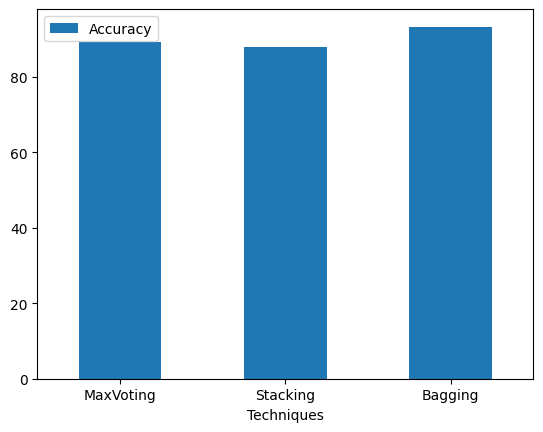

In [221]:
df = pd.DataFrame({'Techniques':['MaxVoting', 'Stacking', 'Bagging'], 'Accuracy':[round(max_voting_result*100,2),round(stacking_result*100,2),round(bagging_classification_result*100,2)]})
ax = df.plot.bar(x='Techniques', y='Accuracy', rot=0)


### `Result`: From the above observation, we can conclude that `Bagging technique` has higher accuracy with `90.67%` as compared to other technique in an ensemble system.

### As per colleague suggestion, the features selection were done based on their corelation values. Hence, there is no necessary for medical team recommended articles.

### Trial & Error: I had implemented all the techniques as part of trial and error. on the basis of results, i have chosen the best technique as mentioned above.